In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from scipy.spatial import distance
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [ ]:
df = pd.read_csv("data.csv", sep=",", index_col='id')

In [ ]:
NewObject = np.array([94, 37])
df['Euclidean'] = [distance.euclidean(obj, NewObject) for index, obj in df.iloc[:,:2].iterrows()]
df

,X,Y,Class,Euclidean
id,,,,
1,61,48,1,34.785054
2,62,28,1,33.241540
3,83,84,0,48.270074
4,68,24,1,29.068884
5,56,39,1,38.052595
6,32,95,1,84.899941
7,99,14,1,23.537205
8,87,64,0,27.892651
9,44,35,0,50.039984


In [ ]:
def neighbors(k):
  return list(df.sort_values(by='Euclidean').head(k).index), list(df.sort_values(by='Euclidean').head(k).Euclidean)
k = 3
ids, dists = neighbors(k)
df.loc[ids]

,X,Y,Class,Euclidean
id,,,,
7,99,14,1,23.537205
10,70,51,0,27.784888
8,87,64,0,27.892651


In [ ]:
df['Manhattan'] = [distance.cityblock(obj, NewObject) for index, obj in df.iloc[:,:2].iterrows()]
df['Chebyshev'] = [distance.chebyshev(obj, NewObject) for index, obj in df.iloc[:,:2].iterrows()]
df

,X,Y,Class,Euclidean,Manhattan,Chebyshev
id,,,,,,
1,61,48,1,34.785054,44,33
2,62,28,1,33.241540,41,32
3,83,84,0,48.270074,58,47
4,68,24,1,29.068884,39,26
5,56,39,1,38.052595,40,38
6,32,95,1,84.899941,120,62
7,99,14,1,23.537205,28,23
8,87,64,0,27.892651,34,27
9,44,35,0,50.039984,52,50


In [ ]:
df['Weighted'] = 1/df.Euclidean**2
df[df['Class'] == 0].Weighted.sum()


0.0034092294029870068

In [ ]:
df[df['Class'] == 1].Weighted.sum()

0.005549252234829937

In [ ]:
def neighbors_m(k):
  return list(df.sort_values(by='Manhattan').head(k).index), list(df.sort_values(by='Manhattan').head(k).Manhattan)
k = 3
ids, dists = neighbors_m(k)
df.loc[ids]

,X,Y,Class,Euclidean,Manhattan,Chebyshev,Weighted
id,,,,,,,
7,99,14,1,23.537205,28,23,0.001805
8,87,64,0,27.892651,34,27,0.001285
10,70,51,0,27.784888,38,24,0.001295


In [ ]:
df['Weighted_m'] = 1/df.Manhattan**2
df[df['Class'] == 0].Weighted_m.sum()

0.002224660324467743

In [ ]:
df[df['Class'] == 1].Weighted_m.sum()

0.00373882976769011

Task 2


In [ ]:
df1 = pd.read_csv("adult_data_train.csv")
df1

In [ ]:
df1 = df1.drop('education', axis=1)
df1 = df1.drop('marital-status', axis=1)

In [ ]:
df_non_numeric = df1.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['workclass' 'occupation' 'relationship' 'race' 'sex' 'native-country']


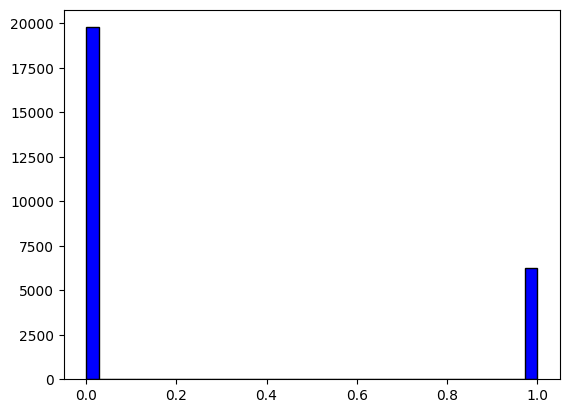

In [ ]:
plt.hist(df1['label'], color = 'blue', edgecolor = 'black',bins = int(180/5))
plt.show()

In [ ]:
df1['label'].value_counts()

0    19775
1     6273
Name: label, dtype: int64

In [ ]:
d = 19775/(19775 + 6273)
d

0.7591753685503686

In [ ]:
cat_mask = (df1.dtypes.values==object)
df2 = df1[df1.columns[~cat_mask]]
df2

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
0,32,37210,13,0,0,45,1
1,43,101950,14,0,0,45,0
2,20,122244,9,0,0,28,0
3,40,24763,10,6849,0,40,0
4,24,113936,13,0,0,40,0
...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0
26044,39,421633,10,0,0,30,0
26045,55,82098,9,0,0,55,0
26046,26,50053,13,0,0,55,0


In [ ]:
x = df2
y = df2['label']
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11, stratify=df2['label'])
X_train = X_train.drop(columns='label')
X_test = X_test.drop(columns='label')
X_train['fnlwgt'].mean()
X_train['fnlwgt']

22543    237995
15496    122756
6063     179203
16073    356689
9293     206609
          ...  
11896    197558
24596    166606
8340     130807
769      165315
15232    266135
Name: fnlwgt, Length: 20838, dtype: int64

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
f1_score(y_test, knn.predict(X_test))

0.3689119170984456

In [ ]:
sc = MinMaxScaler()
x_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
x_test = sc.fit_transform(X_test)
x_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.273973,0.153292,0.666667,0.0,0.0,0.479592
1,0.109589,0.075027,0.400000,0.0,0.0,0.346939
2,0.095890,0.113363,0.466667,0.0,0.0,0.551020
3,0.191781,0.233903,0.800000,0.0,0.0,0.397959
4,0.219178,0.131976,0.800000,0.0,0.0,0.448980
...,...,...,...,...,...,...
20833,0.178082,0.125829,0.533333,0.0,0.0,0.397959
20834,0.260274,0.104808,0.400000,0.0,0.0,0.397959
20835,0.136986,0.080495,0.733333,0.0,0.0,0.397959
20836,0.534247,0.103931,0.333333,0.0,0.0,0.704082


In [ ]:
x_train['fnlwgt'].mean()

0.1207255804009474

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(x_train, y_train)
f1_score(y_test, knn1.predict(x_test))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.5103697024346258

In [ ]:
df1.head()

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0


<Axes: xlabel='sex', ylabel='capital-gain'>

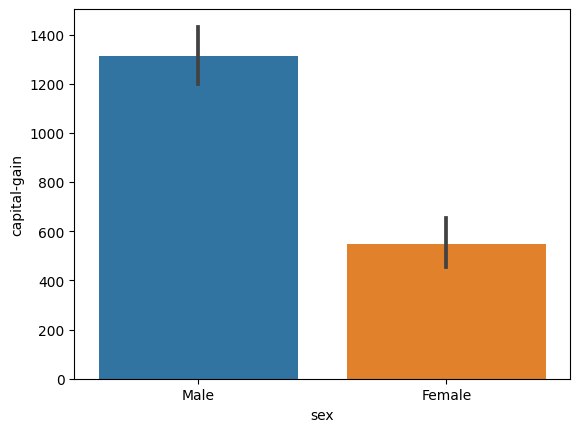

In [ ]:
sns.barplot(x='sex', y='capital-gain', data=df1)

In [ ]:
df1 = df1[df1['workclass'] != '?' ]
df1 = df1[df1['occupation'] != '?' ]
df1 = df1[df1['relationship'] != '?' ]
df1 = df1[df1['race'] != '?' ]
df1 = df1[df1['sex'] != '?' ]
df1 = df1[df1['native-country'] != '?' ]
X_new = pd.get_dummies(df1[['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country']], drop_first=True)
df1 = pd.concat([df1, X_new], axis=1)

In [ ]:
X = df1
Y = df1['label']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=11, stratify=df1['label'])
X_train1 = X_train1.drop(columns=['label', 'workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
X_test1 = X_test1.drop(columns=['label', 'workclass', 'occupation', 'relationship', 'race', 'sex','native-country'])

sc.fit(X_train1)
x_train1 = sc.transform(X_train1)
x_test1 = sc.transform(X_test1)

knn2 = KNeighborsClassifier()
knn2.fit(x_train1, y_train1)
f1_score(y_test1, knn2.predict(x_test1))

0.6227333038478549

In [ ]:
df3 = pd.read_csv("adult_data_train.csv")
df3 = df3.drop('education', axis=1)
df3 = df3.drop('marital-status', axis=1)
df3

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


In [ ]:
df3['native-country'].value_counts()

In [ ]:
df3['workclass'] = df3['workclass'].replace('?', 'Private')

In [ ]:
df3['occupation'] = df3['occupation'].replace('?', 'Prof-specialty')

In [ ]:
df3['native-country'] = df3['native-country'].replace('?', 'United-States')

In [ ]:
X_new1 = pd.get_dummies(df3[['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country']], drop_first=True)
df3 = pd.concat([df3, X_new1], axis=1)

In [ ]:
df3

In [ ]:
X1 = df3
Y1 = df3['label']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, Y1, test_size=0.2, random_state=11, stratify=df3['label'])
X_train2 = X_train2.drop(columns=['label', 'workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
X_test2 = X_test2.drop(columns=['label', 'workclass', 'occupation', 'relationship', 'race', 'sex','native-country'])
X_train2


In [ ]:
sc.fit(X_train2)
x_train2 = sc.transform(X_train2)
x_test2 = sc.transform(X_test2)

knn3 = KNeighborsClassifier()
knn3.fit(x_train2, y_train2)
f1_score(y_test2, knn3.predict(x_test2))

0.6137610806247362